# Trabalho 4 - Operações Geométricas

## Scanner doméstico usando um celular.

Os filhos do professor de visão computacional são aficionados por Star Wars. O maiorzinho queria uma imagem de um storm trooper como plano de fundo para o seu tablet. Contudo, o scanner de casa está quebrado e o salário do professor está muito atrasado. O pior é que o governador Pezão nem sequer diz quando vai pagar os três salário em atraso. Como a grana está curta, o professor resolveu usar câmera do celular. No entanto, é sabido que a imagem obtida pela câmera impõe à imagem original uma geometria projetiva e esta distorção precisa ser compensada já que o garoto ficou muito triste com a qualidade do resultado obtido pela câmera. Felizmente, como o pai dos meninos é professor, ele propôs que seus alunos da Uerj resolvessem este problema como trabalho para a disciplina. Para facilitar a tarefa, o professor fotografou a imagem do storm trooper sobre uma folha de papel A4 que serve como referência. Obtenha a transformação projetiva que recupere a geometria da imagem original e reconstrua-a usando a interpolação bilinear. Veja a seguir a imagem de entrada.

Faça toda a álgebra linear manualmente, das bibliotecas usadas no curso, você só pode usar as funções  ```imread``` e ```imwrite```.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

-------

#### Definição de Funções

In [2]:
def img2binary(img, threshold = 60):
    """Binarization of image with threshold given"""
    return threshold < img

In [3]:
def roberts(img):
    """Apply Roberts filter to image"""
    k_robertsx = np.array([[1, 0], [0, -1]])
    k_robertsy = np.array([[0, 1], [-1, 0]])
    robertsx = cv.convertScaleAbs(cv.filter2D(img, cv.CV_64F, cv.flip(k_robertsx, -1)))
    robertsy = cv.convertScaleAbs(cv.filter2D(img, cv.CV_64F, cv.flip(k_robertsy, -1)))
    
    return robertsx + robertsy

In [4]:
def binary_roberts(img, threshold = 60):
    """Returns roberts image in binary scale"""
    return img2binary(roberts(img), threshold).astype(np.uint8)

In [5]:
def detect_corners(img):
    """Detect corners based on non zero pixel of image object borders"""
    b = np.where(img > 0)
    p1 = np.array([b[0][np.argmin(b[0])], b[1][np.argmin(b[0])]])
    p2 = np.array([b[0][np.argmax(b[1])], b[1][np.argmax(b[1])]])
    p3 = np.array([b[0][np.argmax(b[0])], b[1][np.argmax(b[0])]])
    p4 = np.array([b[0][np.argmin(b[1])], b[1][np.argmin(b[1])]])
    
    return np.array([p1, p2, p3, p4])

In [6]:
def cornerfy_from_file(filein, fileout = ''):
    imgin = cv.imread(filein, 0)
    roberts_binary = binary_roberts(imgin)
    corners = detect_corners(roberts_binary)
#     save_image_with_corners(imgin, corners, fileout)
    return roberts_binary, corners

In [7]:
def cornerfy_from_array(arrayin, fileout = ''):
    roberts_binary = binary_roberts(arrayin)
    corners = detect_corners(roberts_binary)
#     save_image_with_corners(arrayin, corners, fileout)
    return roberts_binary, corners

-------

In [8]:
img_init = cv.imread('../images/IMG_20170615_082455.jpg', 0)

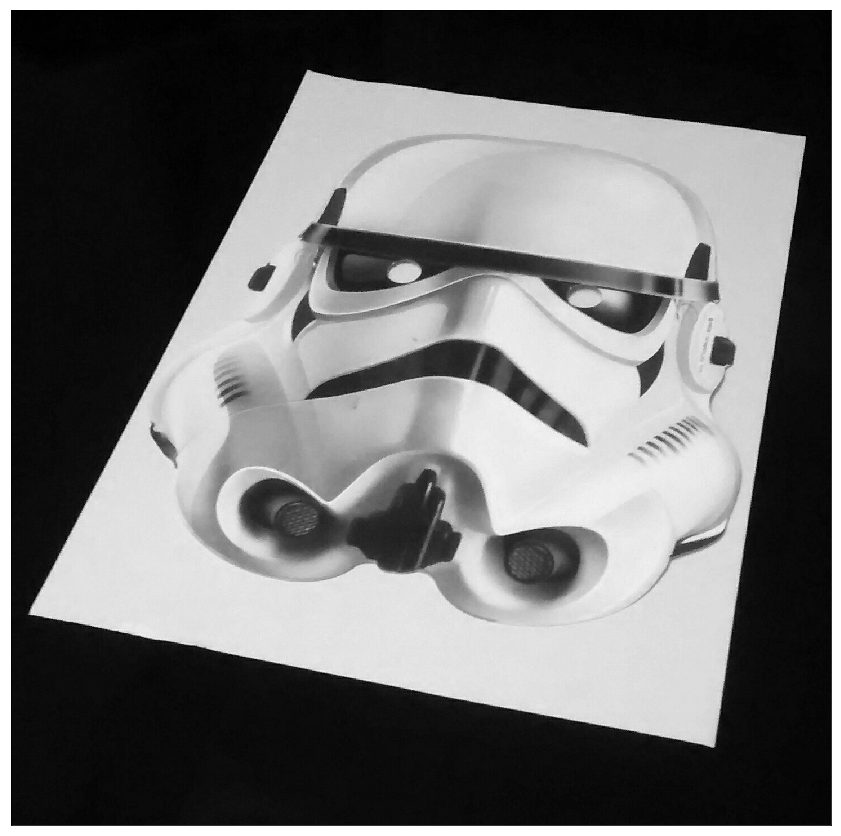

In [9]:
fig = plt.figure(figsize = (21,15))

plt.imshow(img_init, cmap = 'gray')
plt.xticks([])
plt.yticks([])

plt.show()

In [10]:
# A4 para 150 ppi
# A4 totalmente branco
a4 = np.ones((1754, 1240), dtype = np.uint8) * 255

In [13]:
a5 = np.uint8([[(30 <= x + y) & (10 >= -x + y) & (-10 <= -x + y) & (50 >= x + y) for y in range(41)] for x in range(41)]) * 255

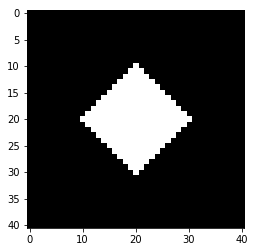

In [14]:
plt.imshow(a5, cmap = 'gray')
plt.show()

In [15]:
img_roberts = roberts(img_init)

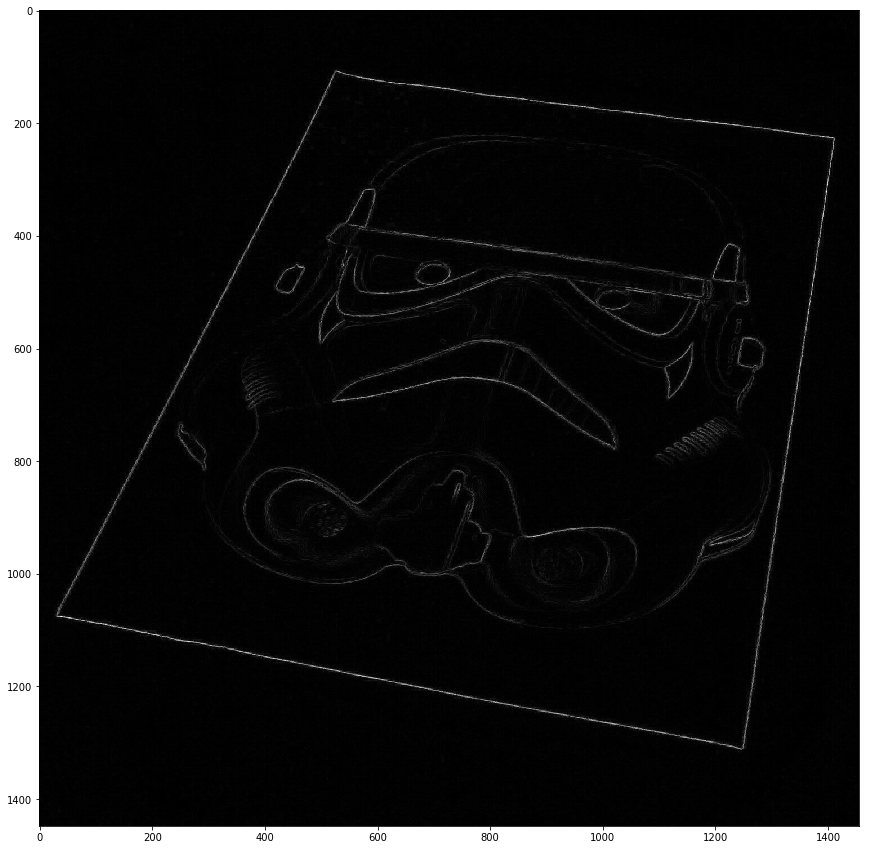

In [16]:
fig = plt.figure(figsize = (21,15))

plt.imshow(img_roberts, cmap = 'gray')
plt.show()

In [24]:
img_roberts, img_corners = cornerfy_from_array(img_init)

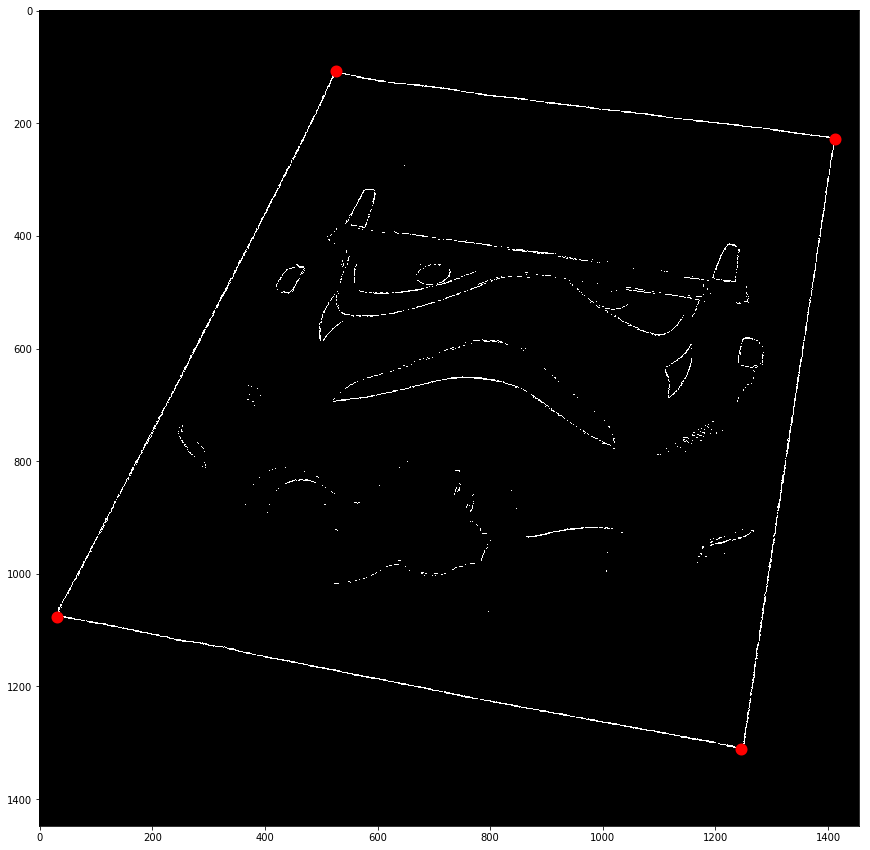

In [26]:
fig = plt.figure(figsize = (21,15))

plt.imshow(img_roberts, cmap = 'gray')
plt.scatter(img_corners[:,1], img_corners[:,0], marker = 'o', color = 'red', linewidths = 6)
plt.show()

In [27]:
a5_roberts, a5_corners = cornerfy_from_array(a5)

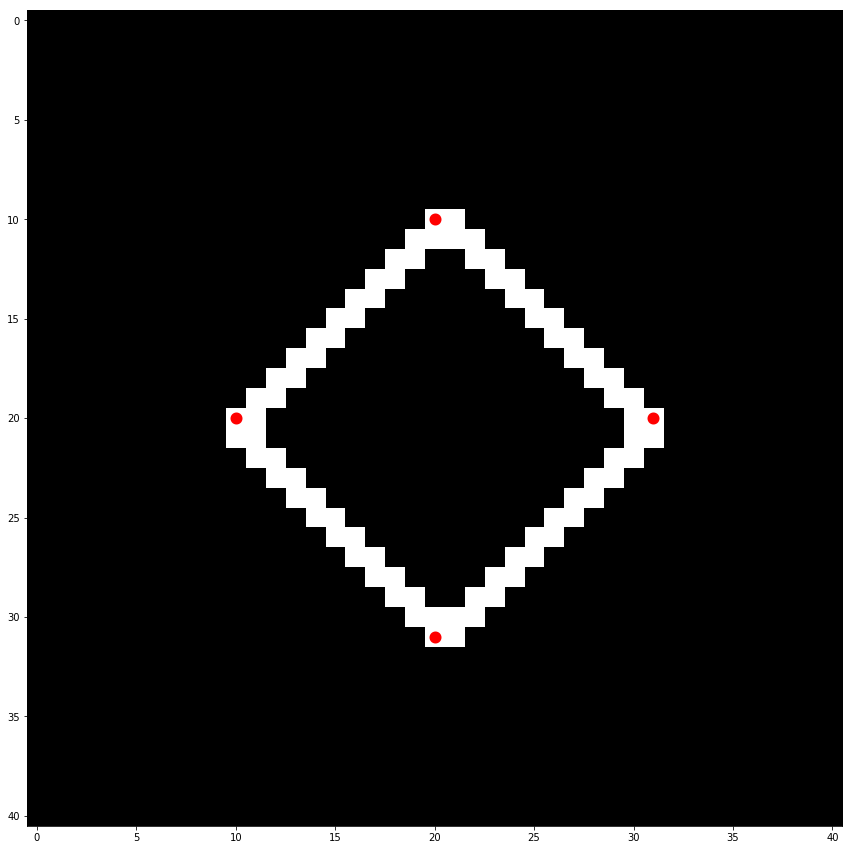

In [28]:
fig = plt.figure(figsize = (21,15))

plt.imshow(a5_roberts, cmap = 'gray')
plt.scatter(a5_corners[:,1], a5_corners[:,0], marker = 'o', color = 'red', linewidths = 6)
plt.show()

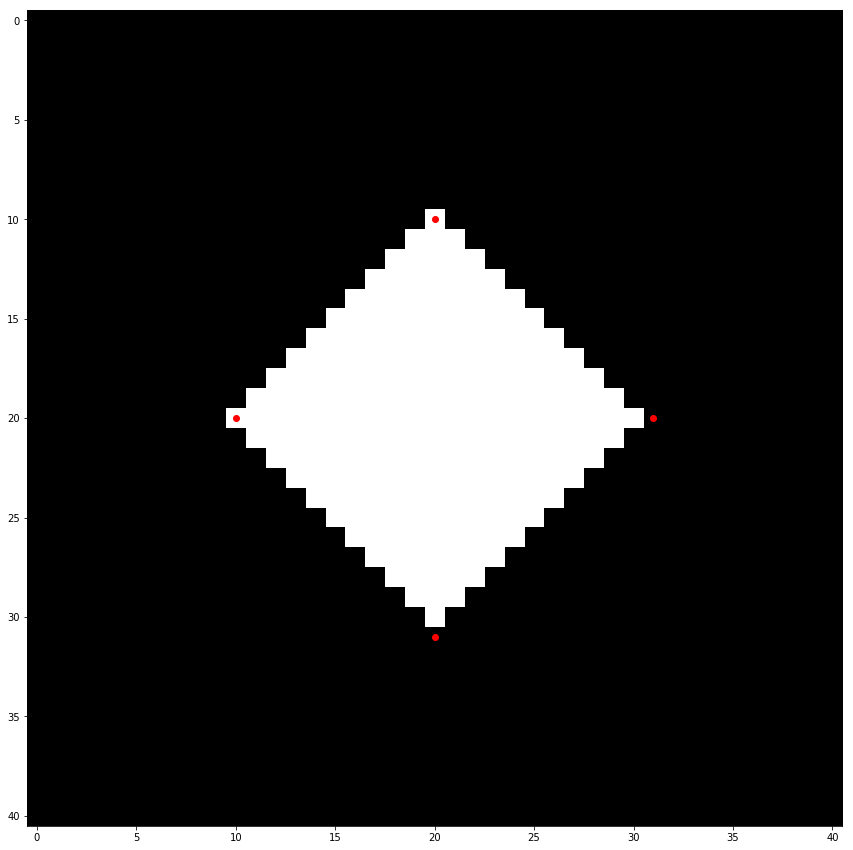

In [29]:
fig = plt.figure(figsize = (21,15))

plt.imshow(a5, cmap = 'gray')
plt.scatter(a5_corners[:,1], a5_corners[:,0], marker = 'o', color = 'red', linewidths = 1)
plt.show()

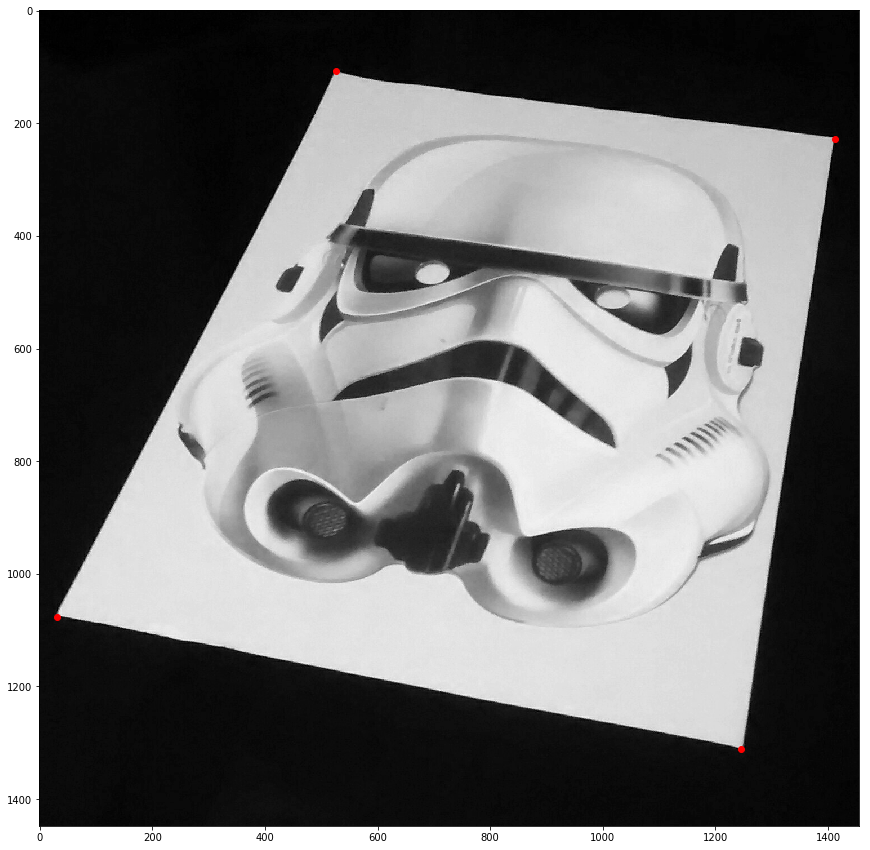

In [30]:
fig = plt.figure(figsize = (21,15))

plt.imshow(img_init, cmap = 'gray')
plt.scatter(img_corners[:,1], img_corners[:,0], marker = 'o', color = 'red', linewidths = 1)
plt.show()

In [31]:
def harris(img, blocksize, ksize, k):
    return cv.cornerHarris(np.float32(img), blocksize, ksize, k)

In [144]:
blocksize = 3
ksize = 5
k = 1

In [147]:
img_init

array([[1, 1, 2, ..., 5, 5, 5],
       [0, 0, 1, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       ...,
       [9, 9, 9, ..., 5, 6, 3],
       [9, 9, 9, ..., 5, 6, 3],
       [9, 9, 9, ..., 5, 6, 3]], dtype=uint8)

In [152]:
img_harris = cv.cornerHarris(img_init, blockSize = blocksize, ksize = ksize, k = k).astype(np.uint8)

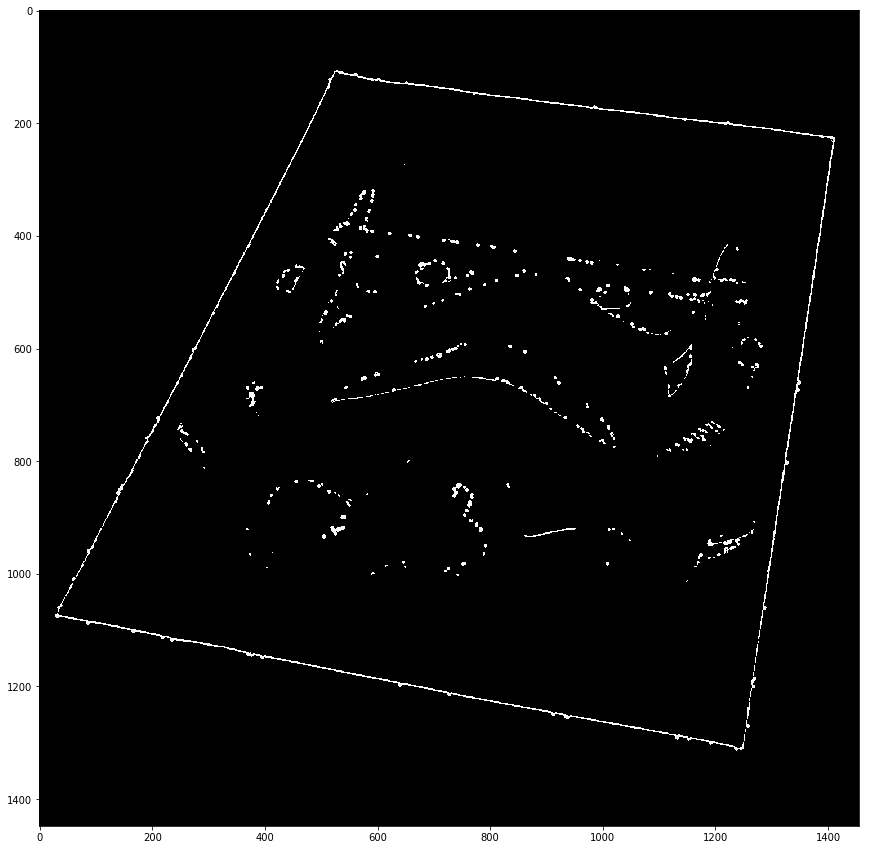

In [154]:
fig = plt.figure(figsize = (21,15))

plt.imshow(img_harris, cmap = 'gray')
plt.show()

Não preciso da Dilatação ou Erosão...

In [158]:
img_dilate = cv.dilate(img_harris, None)
img_erode = cv.erode(img_harris, None)

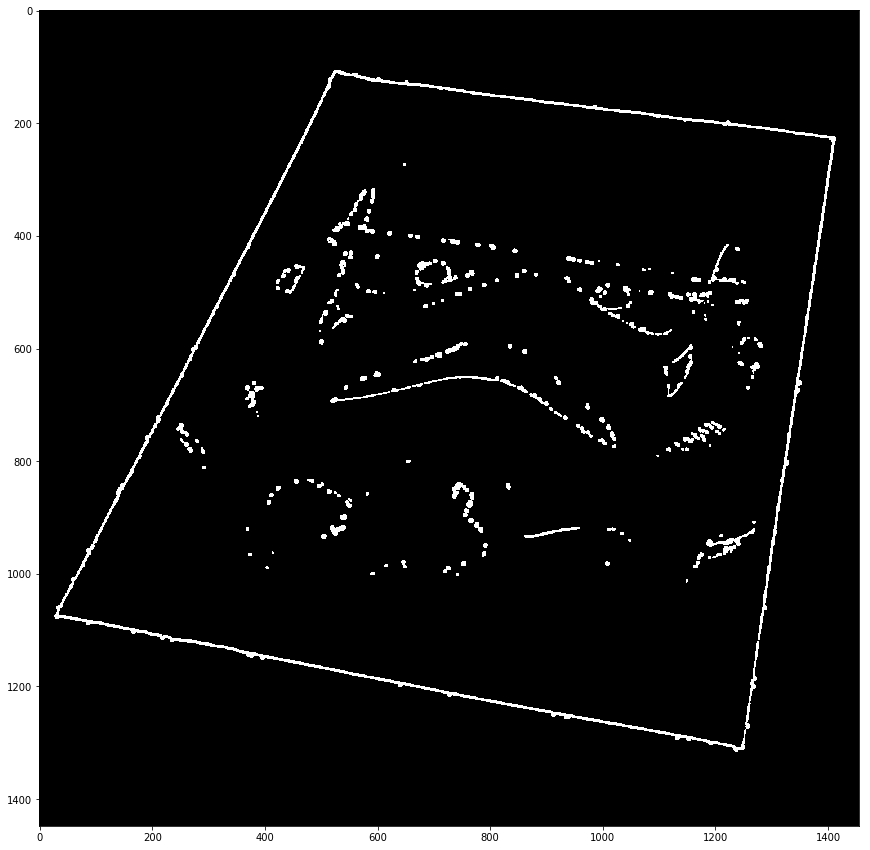

In [157]:
fig = plt.figure(figsize = (21,15))

plt.imshow(img_dilate, cmap = 'gray')
plt.show()

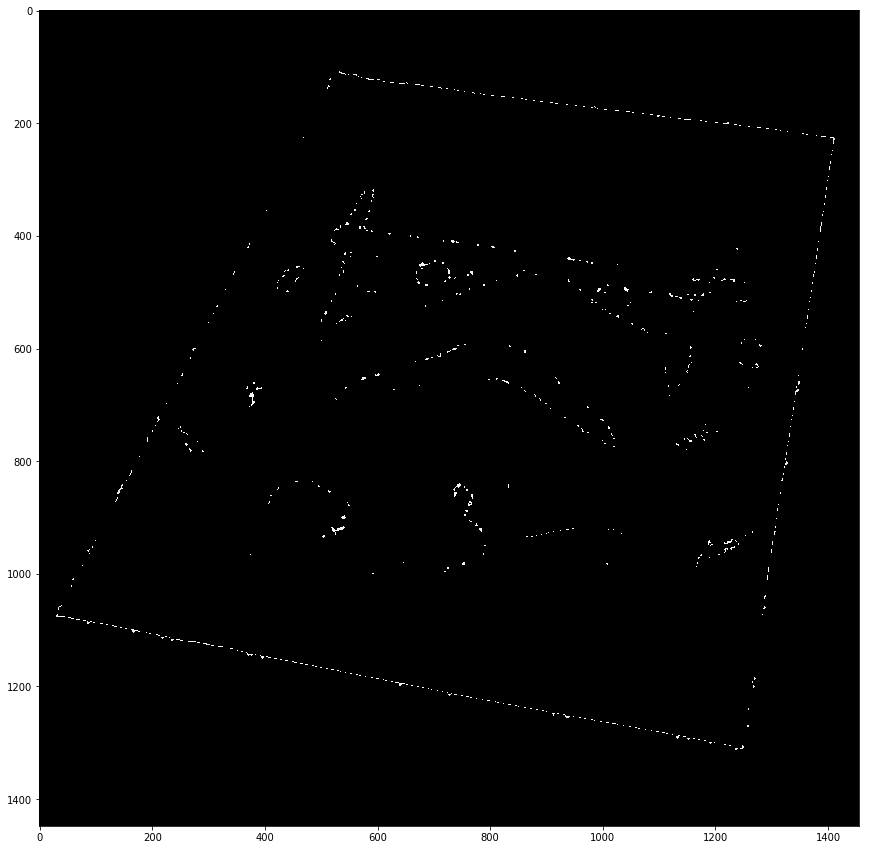

In [159]:
fig = plt.figure(figsize = (21,15))

plt.imshow(img_erode, cmap = 'gray')
plt.show()

Deixa os contornos realçadas de branco!

In [160]:
img_init[img_harris > 0.01 * img_harris.max()] = [255]

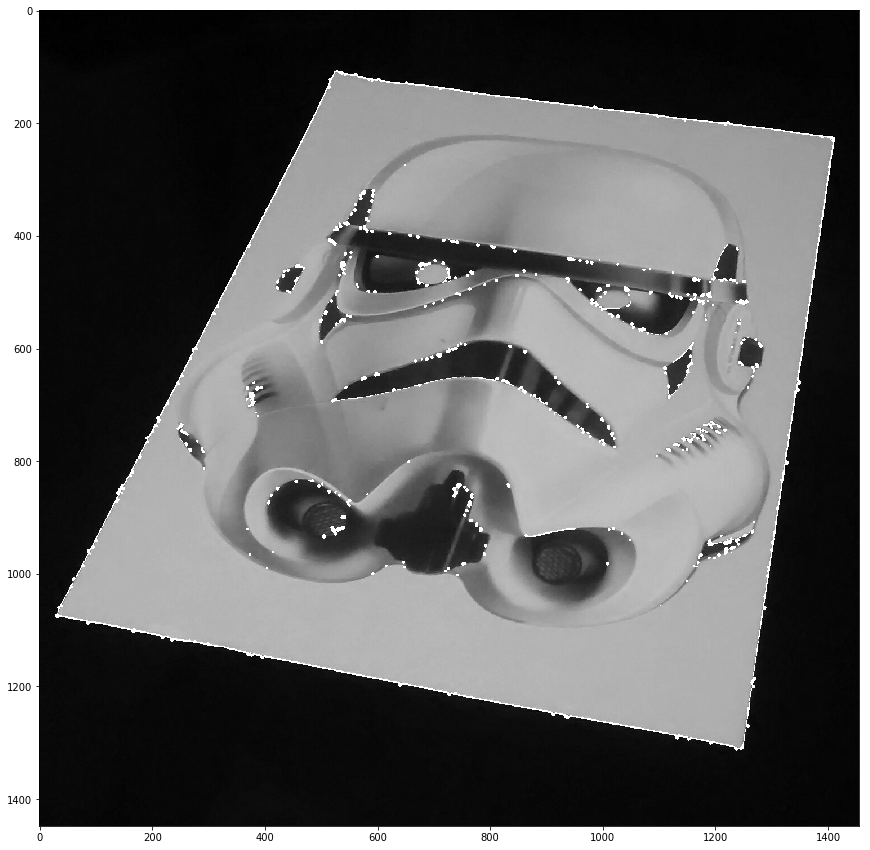

In [161]:
fig = plt.figure(figsize = (21,15))

plt.imshow(img_init, cmap = 'gray')
plt.show()